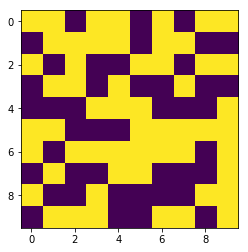

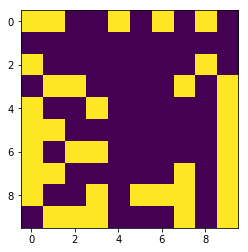

In [2]:
# 參考：用來生成 Game of Life 的下一個狀態，用來檢查
import numpy as np

def game(board):
    board_pad = np.pad(board, 1, 'constant', constant_values = 0)
    # 用比較笨的方式，厲害一點用 http://stackoverflow.com/questions/32660953/numpy-sliding-2d-window-calculations
    rtn = np.zeros_like(board)
    for i in range(board.shape[0]):
        for j in range(board.shape[1]):
            alive = board[i, j]
            neighbord_count = board_pad[i:i+3, j:j+3].sum() - alive
            if (alive and neighbord_count == 2) or neighbord_count==3:
                rtn[i,j] = 1
    return rtn
# 隨機生成一個盤面

board = np.random.randint(0,2, size=(10,10))
# 畫出來看看
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(0)
plt.imshow(board)

# 跑出下一個盤面
board_after = game(board)
# 畫出來看看
plt.figure(1)
plt.imshow(board_after);


In [3]:
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input

# 權重
def W1(size,dtype,partition_info):    
    rtn =np.array([
    [[[1, -1]], [[1, -1]], [[1, -1]]],
    [[[1, -1]], [[0, -1]], [[1, -1]]],
    [[[1, -1]], [[1, -1]], [[1, -1]]]
    ])
    return rtn

def b1(size,dtype,partition_info):    
    return np.array([-3,3])

def W2(size,dtype,partition_info):
    return np.array(np.array([[[[-1], [-1]]]]))

def b2(size,dtype,partition_info):
    # just to be safe
    return np.array([1])

inputs = Input(shape=(None,None,1))
hidden = Conv2D(filters=2, kernel_size=3, padding='same', activation="relu",
             kernel_initializer=W1, bias_initializer=b1)(inputs)
out = Conv2D(filters=1, kernel_size=1, padding='same', activation="relu",
             kernel_initializer=W2, bias_initializer=b2)(hidden)
model = Model(inputs, out)

N = 10
boards = np.random.randint(0,2, size=(N,100,100))
rtn = model.predict(boards[..., None])
rtn = (rtn>0).astype('int')
for i in range(N):
    b = game(boards[i])
    assert (b == rtn[i, :, :, 0]).all()
    print("OK", i)

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


OK 0
OK 1
OK 2
OK 3
OK 4
OK 5
OK 6
OK 7
OK 8
OK 9


In [4]:
# 或者用動畫跑跑看 需要 pillow, ipywidgets
# 定義一個動畫的函數
from IPython.display import display
from ipywidgets import Image as Image_widget
import time
from PIL import Image
def anim(func, time_length, interval=0.1, width=400):
    img = Image_widget(width=width)
    display(img)
    start_time = time.time()
    for t in np.arange(0, time_length, interval):
        frame = Image.fromarray((func(t)*255).astype('uint8'))
        img.value = frame._repr_png_()
        now = time.time()
        if now < start_time+t:
            time.sleep(start_time+t-now)

# 下面跑 Game of Life 的動畫
board = np.random.randint(0,2, size=(100,100))
def glife(t):
    if t>0:
        board[...] = game(board)
    return board
# 一分鐘
anim(glife, 60)

Image(value=b'', width='400')